In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('train_data.csv')
df1 = pd.read_csv('test_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [4]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


<AxesSubplot:xlabel='Bed Grade', ylabel='count'>

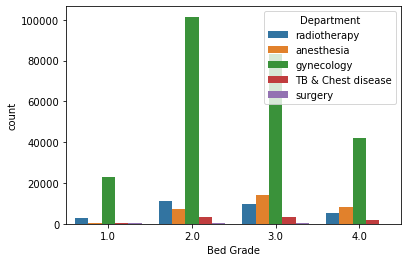

In [5]:
sns.countplot(x = 'Bed Grade',hue = 'Department',data =df)

<AxesSubplot:xlabel='Bed Grade', ylabel='count'>

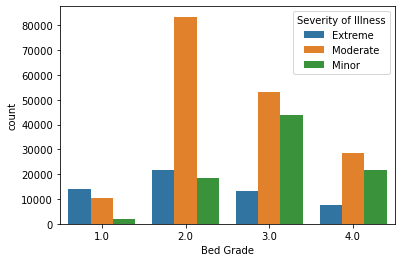

In [6]:
sns.countplot(x = 'Bed Grade',hue = 'Severity of Illness',data =df)

<AxesSubplot:xlabel='Bed Grade', ylabel='count'>

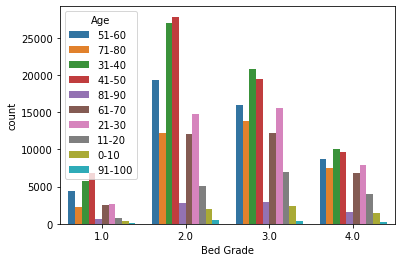

In [7]:
sns.countplot(x = 'Bed Grade',hue = 'Age',data =df)

<AxesSubplot:xlabel='Bed Grade', ylabel='count'>

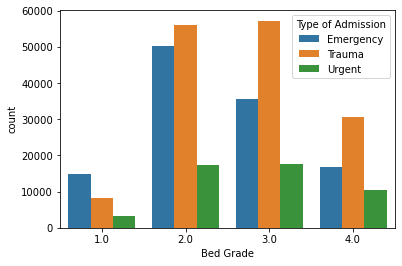

In [8]:
sns.countplot(x = 'Bed Grade',hue ='Type of Admission' ,data =df)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 20.0)

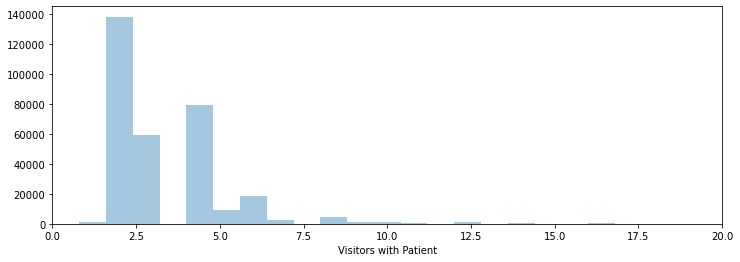

In [9]:
plt.figure(figsize=(12,4))
sns.distplot(df['Visitors with Patient'],kde=False,bins=40)
plt.xlim(0,20)


(0.0, 15000.0)

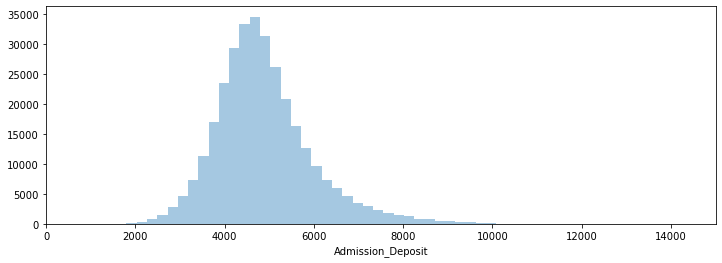

In [10]:
plt.figure(figsize=(12,4))
sns.distplot(df['Admission_Deposit'],kde=False,bins=40)
plt.xlim(0,15000)

(10.0, 0.0)

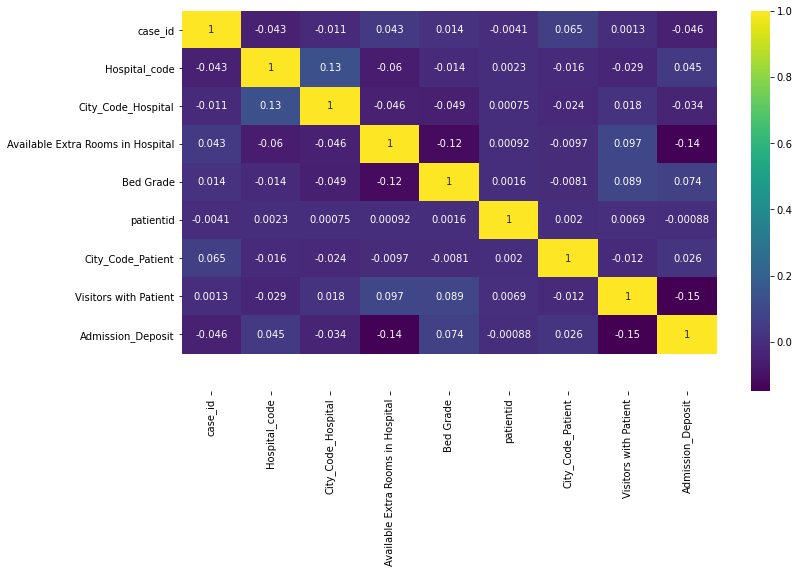

In [11]:
    #TO SEE CORRELATION BETWEEN VARIOUS FEATURES


plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

In [12]:
    #TO FIND IF THERE ARE NULL VALUES OR NOT AND DROPPING THEM IF ANY
df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [15]:
#dropping insignificant features that had negative correlation with our label

new = df.drop(['case_id','Hospital_code','Hospital_type_code','Hospital_region_code','City_Code_Hospital','Available Extra Rooms in Hospital','Ward_Type','Ward_Facility_Code','City_Code_Patient','patientid','Stay'],axis =1)

In [16]:
new

,Department,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,radiotherapy,2.0,Emergency,Extreme,2,51-60,4911.0
1,radiotherapy,2.0,Trauma,Extreme,2,51-60,5954.0
2,anesthesia,2.0,Trauma,Extreme,2,51-60,4745.0
3,radiotherapy,2.0,Trauma,Extreme,2,51-60,7272.0
4,radiotherapy,2.0,Trauma,Extreme,2,51-60,5558.0
...,...,...,...,...,...,...,...
318433,radiotherapy,4.0,Emergency,Moderate,3,41-50,4144.0
318434,anesthesia,4.0,Urgent,Moderate,4,81-90,6699.0
318435,gynecology,4.0,Emergency,Minor,3,71-80,4235.0
318436,anesthesia,3.0,Trauma,Minor,5,11-20,3761.0


In [17]:
new.select_dtypes(['object']).columns

Index(['Department', 'Type of Admission', 'Severity of Illness', 'Age'], dtype='object')

In [17]:
new

,Department,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,radiotherapy,2.0,Emergency,Extreme,2,51-60,4911.0
1,radiotherapy,2.0,Trauma,Extreme,2,51-60,5954.0
2,anesthesia,2.0,Trauma,Extreme,2,51-60,4745.0
3,radiotherapy,2.0,Trauma,Extreme,2,51-60,7272.0
4,radiotherapy,2.0,Trauma,Extreme,2,51-60,5558.0
...,...,...,...,...,...,...,...
318433,radiotherapy,4.0,Emergency,Moderate,3,41-50,4144.0
318434,anesthesia,4.0,Urgent,Moderate,4,81-90,6699.0
318435,gynecology,4.0,Emergency,Minor,3,71-80,4235.0
318436,anesthesia,3.0,Trauma,Minor,5,11-20,3761.0


In [18]:
cat_feats = [ 'Department', 'Type of Admission', 'Severity of Illness', 'Age']

In [19]:
train = pd.get_dummies(new,columns=cat_feats,drop_first=True)

In [20]:
train

,Bed Grade,Visitors with Patient,Admission_Deposit,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,2.0,2,4911.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2.0,2,5954.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,2.0,2,4745.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,2.0,2,7272.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,2.0,2,5558.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,4.0,3,4144.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
318434,4.0,4,6699.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
318435,4.0,3,4235.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
318436,3.0,5,3761.0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0


In [21]:
#after EDA we got to know about features that are acting as outliers
#hence its better to drop them as well
final_train = train.drop(['Age_91-100','Department_anesthesia','Department_surgery','Department_radiotherapy','Age_81-90'],axis =1)

In [22]:
final_train

,Bed Grade,Visitors with Patient,Admission_Deposit,Department_gynecology,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80
0,2.0,2,4911.0,0,0,0,0,0,0,0,0,0,1,0,0
1,2.0,2,5954.0,0,1,0,0,0,0,0,0,0,1,0,0
2,2.0,2,4745.0,0,1,0,0,0,0,0,0,0,1,0,0
3,2.0,2,7272.0,0,1,0,0,0,0,0,0,0,1,0,0
4,2.0,2,5558.0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,4.0,3,4144.0,0,0,0,0,1,0,0,0,1,0,0,0
318434,4.0,4,6699.0,0,0,1,0,1,0,0,0,0,0,0,0
318435,4.0,3,4235.0,1,0,0,1,0,0,0,0,0,0,0,1
318436,3.0,5,3761.0,0,1,0,1,0,1,0,0,0,0,0,0


In [23]:
final_train_= final_train[final_train['Admission_Deposit']<8000]


In [24]:
final_train

,Bed Grade,Visitors with Patient,Admission_Deposit,Department_gynecology,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80
0,2.0,2,4911.0,0,0,0,0,0,0,0,0,0,1,0,0
1,2.0,2,5954.0,0,1,0,0,0,0,0,0,0,1,0,0
2,2.0,2,4745.0,0,1,0,0,0,0,0,0,0,1,0,0
3,2.0,2,7272.0,0,1,0,0,0,0,0,0,0,1,0,0
4,2.0,2,5558.0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,4.0,3,4144.0,0,0,0,0,1,0,0,0,1,0,0,0
318434,4.0,4,6699.0,0,0,1,0,1,0,0,0,0,0,0,0
318435,4.0,3,4235.0,1,0,0,1,0,0,0,0,0,0,0,1
318436,3.0,5,3761.0,0,1,0,1,0,1,0,0,0,0,0,0


In [25]:
final_train= final_train[final_train['Visitors with Patient']<7]

In [26]:
X_train = final_train.drop(['Bed Grade'], axis = 1)

In [27]:
y_train = final_train['Bed Grade']


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
scaler.fit(X_train)


scaled_features = scaler.transform(X_train)



In [32]:
x_train = pd.DataFrame(scaled_features, columns =  X_train.columns)
x_train.head()

,Visitors with Patient,Admission_Deposit,Department_gynecology,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80
0,-0.880838,0.010359,-1.909143,-0.956762,-0.428556,-0.607573,-1.111584,-0.236731,-0.3856,-0.5026,-0.499707,2.37616,-0.342286,-0.355601
1,-0.880838,0.988484,-1.909143,1.045192,-0.428556,-0.607573,-1.111584,-0.236731,-0.3856,-0.5026,-0.499707,2.37616,-0.342286,-0.355601
2,-0.880838,-0.145315,-1.909143,1.045192,-0.428556,-0.607573,-1.111584,-0.236731,-0.3856,-0.5026,-0.499707,2.37616,-0.342286,-0.355601
3,-0.880838,2.224504,-1.909143,1.045192,-0.428556,-0.607573,-1.111584,-0.236731,-0.3856,-0.5026,-0.499707,2.37616,-0.342286,-0.355601
4,-0.880838,0.617116,-1.909143,1.045192,-0.428556,-0.607573,-1.111584,-0.236731,-0.3856,-0.5026,-0.499707,2.37616,-0.342286,-0.355601


In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier(n_neighbors=25)

In [60]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [61]:
df1.isnull().sum() 

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
dtype: int64

In [30]:
df1 = df1.dropna()

In [31]:
df1.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
dtype: int64

In [31]:
new1 = df1.drop(['case_id','Hospital_code','Hospital_type_code','Hospital_region_code','City_Code_Hospital','Available Extra Rooms in Hospital','Ward_Type','Ward_Facility_Code','City_Code_Patient','patientid'],axis =1)

In [32]:
cat_feats1 = [ 'Department','Type of Admission', 'Severity of Illness', 'Age']

In [33]:
final_test = pd.get_dummies(new1,columns=cat_feats1,drop_first=True)


In [34]:
final_test = train.drop(['Age_91-100','Department_anesthesia','Department_surgery','Department_radiotherapy','Age_81-90'],axis =1)

In [35]:
final_test= final_test[final_test['Admission_Deposit']<8000]

In [36]:
final_test= final_test[final_test['Visitors with Patient']<7]

In [37]:
final_test

,Bed Grade,Visitors with Patient,Admission_Deposit,Department_gynecology,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80
0,2.0,2,4911.0,0,0,0,0,0,0,0,0,0,1,0,0
1,2.0,2,5954.0,0,1,0,0,0,0,0,0,0,1,0,0
2,2.0,2,4745.0,0,1,0,0,0,0,0,0,0,1,0,0
3,2.0,2,7272.0,0,1,0,0,0,0,0,0,0,1,0,0
4,2.0,2,5558.0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,4.0,3,4144.0,0,0,0,0,1,0,0,0,1,0,0,0
318434,4.0,4,6699.0,0,0,1,0,1,0,0,0,0,0,0,0
318435,4.0,3,4235.0,1,0,0,1,0,0,0,0,0,0,0,1
318436,3.0,5,3761.0,0,1,0,1,0,1,0,0,0,0,0,0


In [38]:
X_test = final_test.drop(['Bed Grade'], axis = 1)
y_test = final_test['Bed Grade']

In [72]:
scaler1 = StandardScaler()

In [73]:
scaler1.fit(X_test)


scaled_features1 = scaler1.transform(X_test)



In [74]:
x_test = pd.DataFrame(scaled_features1, columns =  X_test.columns)
x_test.head()

,Visitors with Patient,Admission_Deposit,Department_gynecology,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80
0,-0.880014,0.070661,-1.92135,-0.955064,-0.42791,-0.607089,-1.111374,-0.236112,-0.385639,-0.502988,-0.500015,2.376743,-0.342035,-0.355663
1,-0.880014,1.151781,-1.92135,1.047051,-0.42791,-0.607089,-1.111374,-0.236112,-0.385639,-0.502988,-0.500015,2.376743,-0.342035,-0.355663
2,-0.880014,-0.101407,-1.92135,1.047051,-0.42791,-0.607089,-1.111374,-0.236112,-0.385639,-0.502988,-0.500015,2.376743,-0.342035,-0.355663
3,-0.880014,2.517953,-1.92135,1.047051,-0.42791,-0.607089,-1.111374,-0.236112,-0.385639,-0.502988,-0.500015,2.376743,-0.342035,-0.355663
4,-0.880014,0.741308,-1.92135,1.047051,-0.42791,-0.607089,-1.111374,-0.236112,-0.385639,-0.502988,-0.500015,2.376743,-0.342035,-0.355663


In [75]:
pred = knn.predict(x_test)                                                                                        

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
print(confusion_matrix(y_test,pred))

[[ 4333 17823  3064   211]
 [ 3844 90347 23551  1601]
 [ 1909 47807 48748  2557]
 [ 1023 25225 22748  2435]]


In [77]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       0.39      0.17      0.24     25431
         2.0       0.50      0.76      0.60    119343
         3.0       0.50      0.48      0.49    101021
         4.0       0.36      0.05      0.08     51431

    accuracy                           0.49    297226
   macro avg       0.44      0.36      0.35    297226
weighted avg       0.46      0.49      0.44    297226



In [78]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.4907477811496975


In [ ]:
error_rate = []

# It Will take some time since we are predicting and fitting 35 times simultaneously
for i in range(1,35):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
#here this graph will tell us what value of k we should take to get most accuracy

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')